In [25]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder

X=np.array(['Chat','Chien','Chat','Oiseau'])

transformer=LabelEncoder()
transformer.fit(X)
transformer.transform(X)
#il est possible de combiner fit et transform 
transformer.fit_transform(X)

array([0, 1, 0, 2])

Une pipeline est la combinaison d'un transformateur et d'un estimateur.

L'encodage consiste en la transformation des variables en variables numériques. Il y a deux types d'encodages :
-l'encodage ordinal : associer chaque catégorie d'une variable à une valeur décimale unique 

LabelEncoder ne marche que pour une seule variable.

In [26]:
y=np.array(['Chat','Chien','Chat','Oiseau'])

encoder=LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

Pour décoder :

In [27]:
encoder.inverse_transform(np.array([0,0,2,2]))

array(['Chat', 'Chat', 'Oiseau', 'Oiseau'], dtype='<U6')

In [28]:
x=np.array([['Chat','Poils'],
           ['Chien','Poils'],
           ['Chat','Poils'],
           ['Oiseau','Plume']])

In [29]:
encoder=OrdinalEncoder()
encoder.fit_transform(x)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

Le problème avec ce type d'encodage c'est qu'une relation d'ordre est établie entre les classes ce qui n'a pas de sens pour des animaux ici. Pour résoudre cette problématique, il existe l'encodage One Hot.

In [30]:
y=np.array(['Chat','Chien','Chat','Oiseau'])

encoder=LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 3)>

In [34]:
x=np.array([['Chat','Poils'],
           ['Chien','Poils'],
           ['Chat','Poils'],
           ['Oiseau','Plume']])

encoder=OneHotEncoder()
encoder.fit_transform(x) #tableau avec plusieurs variables 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (4, 5)>

Normalisation des données pour réduire les coûts.

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
X=np.array([[70],[80],[120]])
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

Normalisons les données sur les fleurs d'iris.

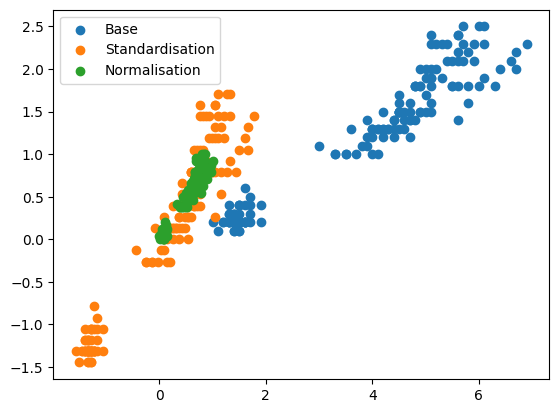

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Charger les données Iris
iris = load_iris()
X=iris.data
X_minmax=MinMaxScaler().fit_transform(X)
X_sdscl=StandardScaler().fit_transform(X)
plt.scatter(X[:,2],X[:,3],label='Base')
plt.scatter(X_sdscl[:,2],X_sdscl[:,3],label='Standardisation')
plt.scatter(X_minmax[:,2],X_minmax[:,3],label='Normalisation')
plt.legend()

Standardisation

In [53]:
X=np.array([[70],[80],[120]])
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

La normalisation ainsi que la standardisation sont très sensibles aux valeurs aberrantes. Lorsque le dataset contient des outliers, il est préférable d'utiliser la méthode RobustScaler.

PolyFeatures

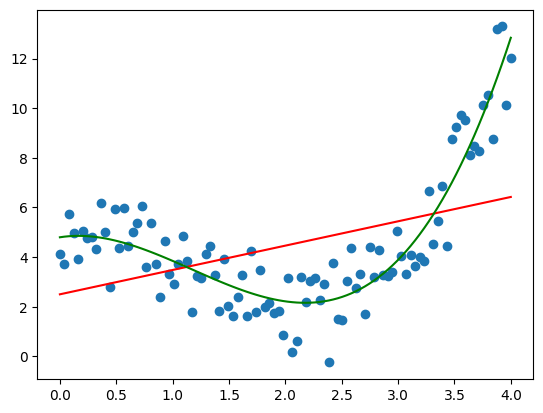

In [55]:
from sklearn.linear_model import LinearRegression
X=np.linspace(0,4,100).reshape((100,1))
y=X**2+5*np.cos(X)+np.random.randn(100,1)
X_poly=PolynomialFeatures(3).fit_transform(X)
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

model_poly=LinearRegression().fit(X_poly,y)
y_pred_poly=model_poly.predict(X_poly)

plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.plot(X,y_pred_poly,c='g')


Pipeline avec le dataset des fleurs d'Iris.

In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Transformer 
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)

#Estimator
model=SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train) 

#Test
X_test_transformed=scaler.fit_transform(X_test)
model.predict(X_test_transformed)

array([0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 0])

On constate que c'est un peu long à coder. Il faut mettre en place un pipeline. 

In [58]:
from sklearn.pipeline import make_pipeline

model=make_pipeline(StandardScaler(),
                    SGDClassifier())
model.fit(X_train,y_train)
model.predict(X_test)

array([0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 2, 0, 2, 1, 1])

In [66]:
from sklearn.model_selection import GridSearchCV

model=make_pipeline(PolynomialFeatures(),
                    StandardScaler(),
                    SGDClassifier(random_state=0))

model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [71]:
# Définition des paramètres à tester avec GridSearchCV
param = {
    'polynomialfeatures__degree': [2, 3, 4],  # Tester les polynômes de degré 2 à 4
    'sgdclassifier__penalty': ['l1', 'l2', 'elasticnet']  # Valeurs correctes
}

# Grid Search avec validation croisée (cv=4)
grid = GridSearchCV(model, param_grid=param, cv=4)
grid.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid.best_params_)

grid.score(X_test,y_test)

Meilleurs paramètres : {'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l1'}


0.9666666666666667